In [3]:
%pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 2.1/199.4 MB 10.7 MB/s eta 0:00:19
    --------------------------------------- 4.5/199.4 MB 11.2 MB/s eta 0:00:18
   - -------------------------------------- 6.6/199.4 MB 10.6 MB/s eta 0:00:19
   - -------------------------------------- 8.9/199.4 MB 10.7 MB/s eta 0:00:18
   -- ------------------------------------- 11.5/199.4 MB 11.3 MB/s eta 0:00:17
   -- ------------------------------------- 13.6/199.4 MB 11.3 MB/s eta 0:00:17
   -- ------------------------------------- 14.7/199.4 MB 10.0 MB/s eta 0:00:19
   --- ------------------------------------ 15.2/199.4 MB 9.7 MB/s eta 0:00:20
   -

In [4]:
%pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/2.9 MB 4.8 MB/s eta 0:00:01
   --------------------- ------------------ 1.6/2.9 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.8 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.8 MB 7.7 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/38.8 MB 7.3 MB/s eta 0:00:05
   ------ --------------------------------- 6.0/38.8 MB 7.0 MB/s eta 0:00:05
   -------- ------------------------------- 8.4/38.8 MB 7.9 MB/s eta 0:00:04
   ---------- ----------------------------- 10.2/38.8 MB 7.9 MB/s eta 0:00:04
   ------------ --------------------------- 12.6/38.8 MB 8.4 MB/s eta 0:00:04
   -------------- ------------------------- 14.2/38.8 MB 8.3 MB/s eta 0:00:03
   -----------

In [5]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


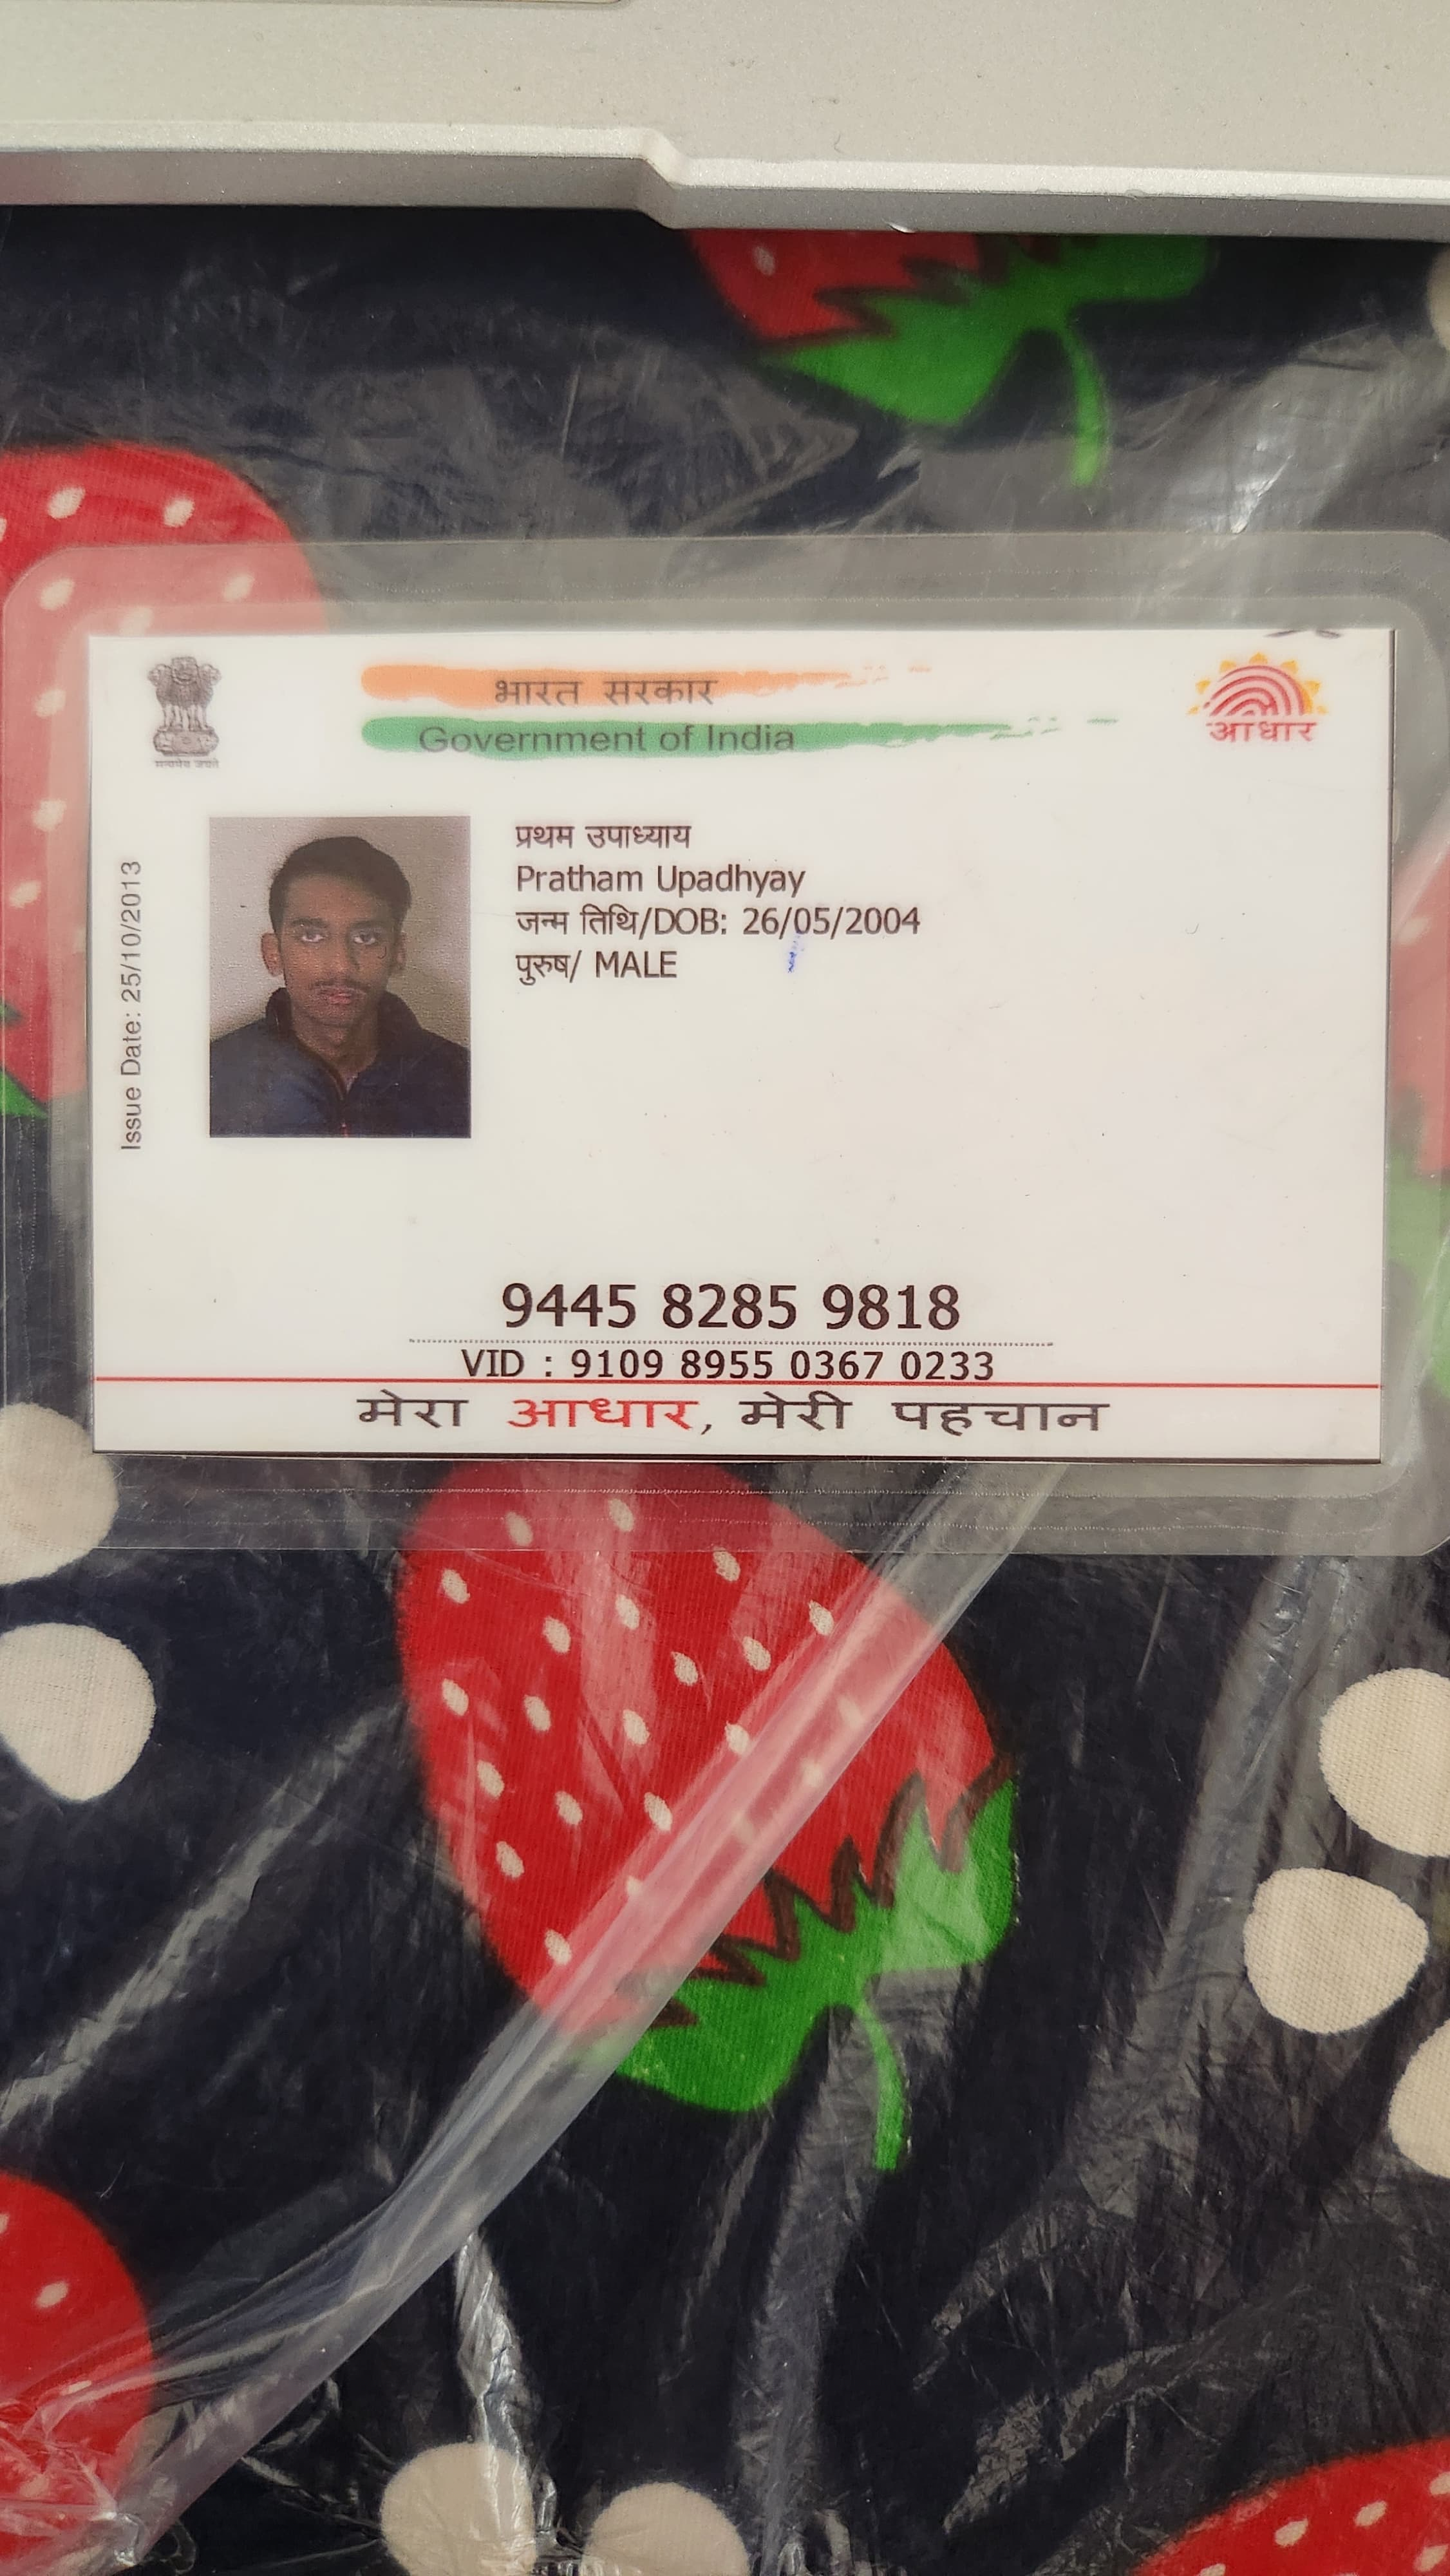

In [33]:
import PIL
from PIL import ImageDraw
import PIL.Image
im = PIL.Image.open('me.jpeg')
im

In [32]:
reader=easyocr.Reader(['en','hi'])
result = reader.readtext('me.jpeg',contrast_ths=0.05,adjust_contrast=0.7,add_margin=0.05,width_ths=0.7,decoder='beamsearch')
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[762, 1050], [1120, 1050], [1120, 1104], [762, 1104]],
  'भारत सरकार',
  0.4784056593555744),
 ([[648, 1122], [1239, 1122], [1239, 1173], [648, 1173]],
  'covernment ollnda',
  0.23708407834459286),
 ([[1880, 1117], [2041, 1117], [2041, 1150], [1880, 1150]],
  '2aझर',
  0.02884063310921192),
 ([[794, 1276], [1080, 1276], [1080, 1323], [794, 1323]],
  'प्रथम उपाध्याय',
  0.8480885739745951),
 ([[798, 1335], [1258, 1335], [1258, 1398], [798, 1398]],
  'Pratham Upadhyay',
  0.8743268337944903),
 ([[182, 1329], [227, 1329], [227, 1561], [182, 1561]],
  'ड्लै',
  0.12235139727729913),
 ([[797, 1395], [1437, 1395], [1437, 1465], [797, 1465]],
  'जन्म तिथि/DOB: २६/05/२0०4',
  0.38516504292742587),
 ([[793, 1465], [1059, 1465], [1059, 1539], [793, 1539]],
  'पुरुष/ MALE',
  0.8658907349203673),
 ([[183, 1580], [222, 1580], [222, 1672], [183, 1672]],
  'ऐ',
  0.1504918397849906),
 ([[189, 1683], [222, 1683], [222, 1779], [189, 1779]],
  'छलूँ',
  0.2582648189252486),
 ([[774, 1983], [1500, 1

In [15]:
import cv2
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
     
     
     


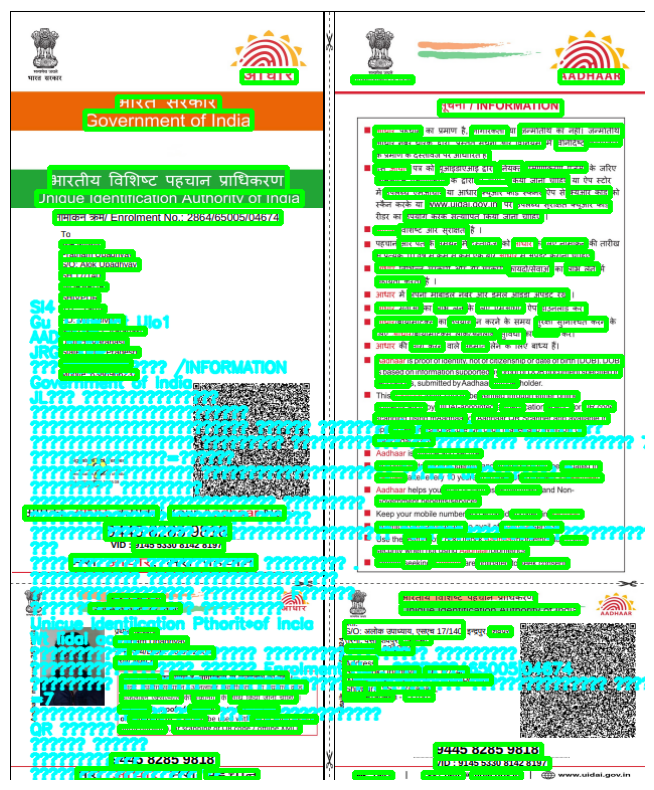

In [28]:
img = cv2.imread('me.jpeg')


# Initialize variables
spacer = 300
font = cv2.FONT_HERSHEY_SIMPLEX

# Iterate through detections
for detection in result: 
    # Get the top-left and bottom-right coordinates of the rectangle
    top_left = tuple(map(int, detection[0][0]))  # Ensure coordinates are integers
    bottom_right = tuple(map(int, detection[0][2]))  # Ensure coordinates are integers
    text = detection[1]
    
    # Draw the rectangle around the detection
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
    
    # Put the text on the image
    img = cv2.putText(img, text, (20, spacer), font, 0.5, (255, 255, 0), 2, cv2.LINE_AA)
    
    spacer += 15

# Convert BGR image (from OpenCV) to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [34]:

for i in result:
  print(i[1])

भारत सरकार
covernment ollnda
2aझर
प्रथम उपाध्याय
Pratham Upadhyay
ड्लै
जन्म तिथि/DOB: २६/05/२0०4
पुरुष/ MALE
ऐ
छलूँ
9445 8285 9818
VID : 9109 8955 0367 0233
मेरा
आधार
मेरी
पहचान


In [27]:



%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [33]:
def read_image_text(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    
    # Convert the image to RGB (OpenCV uses BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Use Tesseract to do OCR on the image
    text = pytesseract.image_to_string(img, lang='eng+hin')  # 'eng+hin' for English and Hindi
    
    return text

# Path to your image
image_path = 'me.png'

# Read text from the image
extracted_text = read_image_text(image_path)

# Print the extracted text
print(extracted_text)

NameError: name 'pytesseract' is not defined